In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from keras import models,layers


In [3]:
from google.colab import drive


In [4]:
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
goal_test='/content/drive/MyDrive/ball/goal_test'
goal_train='/content/drive/MyDrive/ball/goal_train'

nogoal_test = '/content/drive/MyDrive/ball/nogoal_test'
nogoal_train = '/content/drive/MyDrive/ball/nogoal_train'


In [6]:
os.listdir(nogoal_train)


['WhatsApp Image 2022-11-01 at 5.26.27 PM (1).jpeg',
 'WhatsApp Image 2022-11-01 at 5.26.28 PM (1).jpeg',
 '3n.jpeg',
 '7n.jpeg',
 'WhatsApp Image 2022-11-01 at 5.26.26 PM (2).jpeg',
 'WhatsApp Image 2022-11-01 at 5.26.27 PM.jpeg',
 '8n.jpeg',
 '6n.jpeg',
 '5n.jpeg',
 '1n.jpeg',
 'WhatsApp Image 2022-11-01 at 5.26.25 PM.jpeg',
 'WhatsApp Image 2022-11-01 at 5.26.27 PM (2).jpeg',
 '2n.jpeg',
 'WhatsApp Image 2022-11-01 at 5.26.26 PM (1).jpeg',
 'WhatsApp Image 2022-11-01 at 5.26.26 PM.jpeg',
 '4n.jpeg']

In [7]:
def load_img(folder):
    imgs=[]
    for i in os.listdir(folder):
        img=cv2.imread(os.path.join(folder,i))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(256,256))
        imgs.append(img)
    return imgs

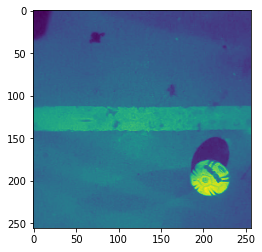

In [8]:
k = load_img(goal_train)
plt.imshow(k[0])

In [9]:
def getarray(folder):
  arrays=np.array(load_img(folder))
  arrays=np.reshape(arrays,(arrays.shape[0],arrays.shape[1]*arrays.shape[2]))
  return arrays

In [10]:
#testing values
x1_test=getarray(goal_test)
x2_test=getarray(nogoal_test)


In [11]:
x_test = np.concatenate((x1_test,x2_test),axis=0)
x_test.shape

(8, 65536)

In [12]:
y0_test=np.zeros(4,dtype=bool)
y1_test=np.ones(4,dtype=bool)

y_test= np.concatenate((y1_test,y0_test),axis=0)
y_test=y_test.reshape(8,1)

y_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False]])

In [13]:
x1 = getarray(goal_train)
x2= getarray(nogoal_train)

In [14]:
x1.shape

(16, 65536)

In [15]:
x = np.concatenate((x1,x2),axis=0)
x.shape

(32, 65536)

In [16]:
y0=np.zeros(16,dtype=bool)
y1=np.ones(16,dtype=bool)

y= np.concatenate((y1,y0),axis=0)
y=y.reshape(32,1)

y

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [17]:

lda = LDA()
lda.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [18]:
y_pred=lda.predict(x_test)
y_pred

array([ True,  True, False,  True,  True, False, False, False])

In [19]:
accuracy_score(y_test,y_pred)

0.75

In [20]:
confusion_matrix(y_test,y_pred)

array([[3, 1],
       [1, 3]])

In [21]:
#NN

In [37]:
network=models.Sequential()


In [38]:
network.add(layers.Dense(512, activation = 'relu', input_shape = (256*256, )))
network.add(layers.Dense(256, activation = 'relu', input_shape = (256*256, )))

network.add(layers.Dense(128, activation = 'leaky_relu', input_shape = (256*256, )))
network.add(layers.Dense(64, activation = 'leaky_relu', input_shape = (256*256, )))

network.add(layers.Dense(1, activation = 'sigmoid', input_shape = (256*256, )))

network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               33554944  
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 33,727,489
Trainable params: 33,727,489
Non-trainable params: 0
_________________________________________________________________


In [39]:
network.compile(optimizer = 'Adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [25]:
x = x.astype('float32') / 255
x.shape
y= y.astype('float32') / 255
y.shape

(32, 1)

In [26]:
x_test= x_test.astype('float32') / 255
x_test.shape
y_test= y_test.astype('float32') / 255
y_test.shape

(8, 1)

In [ ]:
network.fit(x,y,epochs=6)

Epoch 1/6
1/1 [==============================] - 1s 1s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/6
1/1 [==============================] - 0s 153ms/step - loss: 0.6842 - accuracy: 0.5000
Epoch 3/6
1/1 [==============================] - 0s 156ms/step - loss: 0.6735 - accuracy: 0.5000
Epoch 4/6
1/1 [==============================] - 0s 153ms/step - loss: 0.6606 - accuracy: 0.5000
Epoch 5/6
1/1 [==============================] - 0s 140ms/step - loss: 0.6456 - accuracy: 0.5000
Epoch 6/6
1/1 [==============================] - 0s 135ms/step - loss: 0.6280 - accuracy: 0.5000


In [40]:
network.fit(x,y,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.6567 - accuracy: 0.4688 - val_loss: 0.1267 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 248ms/step - loss: 0.1345 - accuracy: 0.5000 - val_loss: 0.1678 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 243ms/step - loss: 0.1781 - accuracy: 0.5000 - val_loss: 0.1425 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 244ms/step - loss: 0.1512 - accuracy: 0.5000 - val_loss: 0.0893 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 243ms/step - loss: 0.0948 - accuracy: 0.5000 - val_loss: 0.0178 - val_accuracy: 0.5000
